# Machine Learning is not magic
# Lab 02 - Data-driven approach

---

# Setup

Before starting, we should install the library `mnist` that allows us to import a famous dataset, a collection of handwritten digits.

In [1]:
!pip install mnist

# Imports

Apart from importing the `mnist` library, we need to import `matplotlib` for plotting, `numpy` to deal with matrices easily and the function `accuracy_score` from `sklearn` to evaluate the algorithm.

In case you don't know, the first line `%matplotlib inline` is an IPython Magic directive that allows us to visualize plots without calling `plt.show()`.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

import mnist

import numpy as np

from sklearn.metrics import accuracy_score

# Load data

In [0]:
IMAGE_W, IMAGE_H = 28, 28

train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

For this example we only want images of 2 numbers (0 and 1) and not all the other images.

In [0]:
NUMBERS = [0, 1]

def filter_by_class(images, labels, numbers):
    idx = labels == numbers[0]
    for i in numbers[1:]:
        idx |= labels == i
    return images[idx], labels[idx]

train_images, train_labels = filter_by_class(train_images, train_labels, NUMBERS)
test_images, test_labels = filter_by_class(test_images, test_labels, NUMBERS)

# Explore images

The next cell only defines the same functions we used in the previous lab (*Lab 01 - Classic approach*).

In [0]:
def plot_image(image, label=None, pred=None, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.axis("off")
    ax.imshow(image)
    if label is not None:
        ax.set_title(f"Label: {label}")

def plot_samples(images, labels, nrows=7, ncols=7, figsize=(10, 10), seed=124):
    np.random.seed(seed)  # for reproducibility
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    for row in ax:
        for col in row:
            n = np.random.randint(len(images))
            image, label = images[n], labels[n]
            plot_image(image, label, ax=col)

# Baseline solution

In any machine learning project it is good to have a baseline model. In this way, we will be creating new models that are better than the previous one. If we are not able to beat the classic approach of the first lab with machine learning, we should not be afraid to put into production a system that has no learning. Do not fall into the *I want to use machine learning because it's cool*, remember the law of the hammer!

The next cell contains one of the best models we get on the las lab (*Lab 02 - Data-driven approach*).

In [0]:
def baseline_predict(image):
    if (image[14, 14] + float(image[15, 14])) / 2 > 93:
        return 1
    return 0

# Evaluate your solution

One of the things we need to improve is the evaluation of the algorithm. If we use our train set to 

In [0]:
def predict_all(images, predict):
    predictions = np.zeros(len(images))
    for i in range(len(images)):
        predictions[i] = predict(images[i])
    return predictions

predictions = predict_all(train_images, predict)
predictions

array([0., 1., 1., ..., 1., 0., 1.])

In [0]:
good_prediction = train_labels == predictions
good_prediction.sum() / len(train_images)

0.9792341097512831

There is an easier way of computing this, using the well-known library SKLearn. We have already import the function `accuracy_score` in the import section (`from sklearn.metrics import accuracy_score`).

In [0]:
accuracy_score(train_labels, predictions)

0.9792341097512831

# Learning from data

In lab 01 we wrote a model and tested it using data. Pero no sería mejor utilizar los datos que tenemos para escribir ese modelo y posteriormente evaularlo usando los datos de test? Es decir, además de utilizar los datos para evaluar el algoritmo, utilizar los datos para que la escritura de ese algoritmo sea lo más automática posible.  De esta forma no tendríamos el problema de intentar combinar 28x28 pixels en una sola expresión, el algoritmo se encargaría de encontrar dicha combiación, mucho mejor de lo que nosotros podríamos hacerlo debido a nuestra limitada capacidad para trabajar con esa cantidad de datos.

# Visualize errors

In [0]:
idx_errors = np.where(good_prediction == False)[0]
print(f"Number of errors: {len(idx_errors)}")
idx_errors

Number of errors: 263


array([    8,    14,   109,   291,   405,   523,   641,   686,   697,
         747,   762,   769,   879,   881,   882,   979,  1082,  1086,
        1090,  1108,  1127,  1129,  1166,  1169,  1193,  1230,  1247,
        1318,  1448,  1463,  1465,  1534,  1617,  1660,  1704,  1721,
        1727,  1757,  1786,  1796,  1813,  1815,  1818,  1821,  1893,
        1899,  1972,  1983,  1985,  2003,  2004,  2010,  2024,  2056,
        2128,  2166,  2172,  2184,  2188,  2284,  2307,  2344,  2448,
        2487,  2525,  2682,  2777,  2779,  2781,  3078,  3101,  3149,
        3202,  3292,  3338,  3354,  3364,  3386,  3419,  3427,  3578,
        3580,  3584,  3655,  3661,  3668,  3695,  3853,  3876,  3882,
        3904,  3970,  4006,  4225,  4305,  4308,  4463,  4495,  4599,
        4611,  4613,  4644,  4646,  4682,  4687,  4697,  4722,  4723,
        4783,  4886,  4926,  5067,  5159,  5207,  5288,  5291,  5369,
        5396,  5441,  5486,  5490,  5502,  5599,  5602,  5613,  5682,
        5694,  5736,

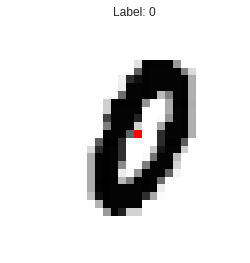

In [0]:
idx_error = 0
idx = idx_errors[idx_error]
plot_image(train_images[idx], train_labels[idx])
plot_pixel(IMAGE_W, IMAGE_H, 14, 14)

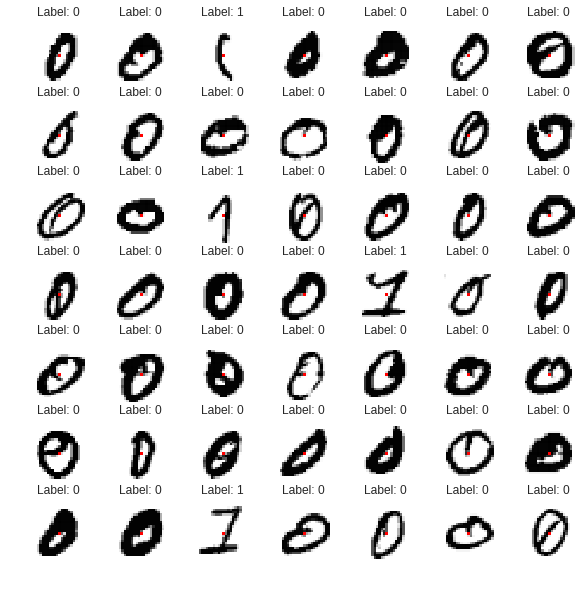

In [0]:
def plot_errors(errors, images, labels, nrows=7, ncols=7, figsize=(10, 10)):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    n = 0
    for row in ax:
        for col in row:
            if n < len(errors):  # Avoid errors if we have less than nrows*ncols errors
                idx = errors[n]
                image, label = images[idx], labels[idx]
                plot_image(image, label, ax=col)
                plot_pixel(IMAGE_W, IMAGE_H, 14, 14, ax=col)
                n += 1

plot_errors(idx_errors, train_images, train_labels)

# Improving the algorithm

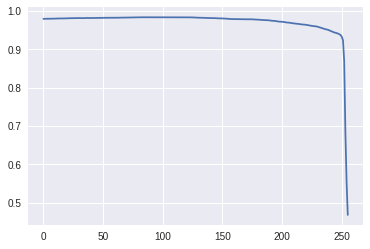

In [0]:
def optimize_threshold(images, labels):
    accuracy = np.zeros(256)
    for i in range(256):
        def predict(image):
            if image[14, 14] > i:
                return 1
            return 0

        predictions = predict_all(images, predict)
        accuracy[i] = accuracy_score(labels, predictions)
    return accuracy

accuracy = optimize_threshold(train_images, train_labels)
plt.plot(accuracy)

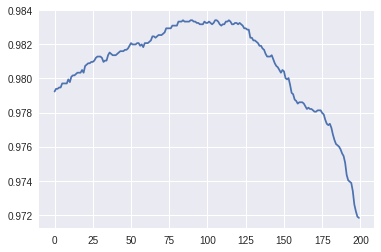

In [0]:
plt.plot(accuracy[:200])

Using the `np.argmax` function we can get the index of the maximum accuracy. In this case, the index is exactily the same as the threshold.

In [0]:
best = np.argmax(accuracy)
best

84

We can now define a new predict function using that value. The accuracy you get here is the best accuracy you can get using this algorithm.

In [0]:
def predict(image):
    if image[14, 14] > best:
        return 1
    return 0

predictions = predict_all(train_images, predict)
accuracy_score(train_labels, predictions)

0.9834188709040663

We can look to any other pixel, for example, instead of using the pixel (14, 14) we will get better performance using (15, 14). You can do another exhaustive search to try to improve this result.

In [0]:
def predict(image):
    if image[15, 14] > best:
        return 1
    return 0

predictions = predict_all(train_images, predict)
accuracy_score(train_labels, predictions)

0.9841294907224635

We are not limited to one pixel, we can use several pixels and combine them!

In [0]:
def predict(image):
    if (image[14, 14] + float(image[15, 14])) / 2 > 93:
        return 1
    return 0

predictions = predict_all(train_images, predict)
accuracy_score(train_labels, predictions)

0.9854717726016581

There are $28 * 28 = 784$ pixels. Can you combine all them in a formula? If you could, would it be easy to maintain that code?

Number of errors: 184


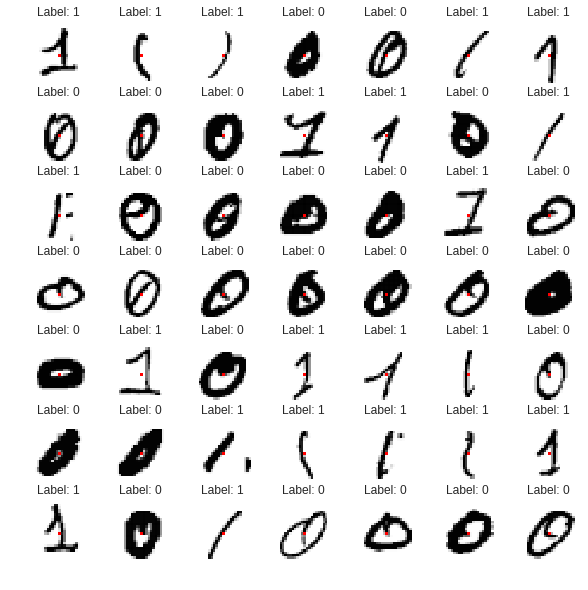

In [0]:
good_prediction = train_labels == predictions
print(f"Number of errors: {len(idx_errors)}")
idx_errors = np.where(good_prediction == False)[0]
plot_errors(idx_errors, train_images, train_labels)

# To think about it

Before reading the conclusions think about...

* What happen if instead of using zeros and ones we change to any others numbers?
* If we want to improve performance, we need to look to errors and try to take into account those specific cases in our algorithm. Can we get 0 errors in the data we have?


# Conclusions and take aways

* You have learnt what an image is for a computer and how to deal with them using `numpy`.
* It is really important to visualize the data we are working with.
* It is also very important to visualize errors to try to figure out when the algorithm is failing.
* This program is very difficult to adapt to any other numbers distinct from zero and one.
* This problem is relatively easy, but how to detect a face in an image? What pixel should we look at? There are complex problems out there that need a more general solution.
* We can always get a 0 error rating, we can memorize all the data we have but that does not ensures a good performance when we test the algorithm on new images. We need to improve the way we are testing our algorithm.
